Fazer a importação do arquivo disponível em https://raw.githubusercontent.com/ironhack-datalabs/datalis0819/master/module-2/lab-tableau-data-visualization/data/countries-of-the-world.csv. A base de dados traz informações sobre os países do mundo.

In [2]:
import pandas as pd
import numpy as np

In [3]:
base = "https://raw.githubusercontent.com/ironhack-datalabs/datalis0819/master/module-2/lab-tableau-data-visualization/data/countries-of-the-world.csv"
df = pd.read_csv(base)

In [4]:
df.columns = df.columns.str.replace(' ', '_') 
df.columns = df.columns.str.replace('(', '') 
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('.', '')  
df.columns = df.columns.str.replace('/', '_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           227 non-null    object 
 1   Region                            227 non-null    object 
 2   Population                        227 non-null    int64  
 3   Area_sq_mi                        227 non-null    int64  
 4   Pop_Density_per_sq_mi             227 non-null    object 
 5   Coastline_coast_area_ratio        227 non-null    object 
 6   Net_migration                     224 non-null    object 
 7   Infant_mortality_per_1000_births  224 non-null    object 
 8   GDP_$_per_capita                  226 non-null    float64
 9   Literacy_%                        209 non-null    object 
 10  Phones_per_1000                   223 non-null    object 
 11  Arable_%                          225 non-null    object 
 12  Crops_% 

1)Determinar a quantidade de países por região (Region).

In [6]:
df_agrupado = df.groupby('Region')['Country'].count().reset_index()
df_agrupado

,Region,Country
0,ASIA (EX. NEAR EAST),28
1,BALTICS,3
2,C.W. OF IND. STATES,12
3,EASTERN EUROPE,12
4,LATIN AMER. & CARIB,45
5,NEAR EAST,16
6,NORTHERN AFRICA,6
7,NORTHERN AMERICA,5
8,OCEANIA,21
9,SUB-SAHARAN AFRICA,51


2) Determinar quantos países possuem mais de 100 milhoẽs de habitantes.

In [8]:
#df.query('Population > 100000000').shape[0]
#df[df['Population'] > 100000000].shape[0]
country_big_habitante = df.query('Population > 100000000')
country_big_habitante.shape[0]

11

3) Apresentar a mediana da mortalidade infantil.

In [9]:
df['Infant_mortality_per_1000_births']= pd.to_numeric(df['Infant_mortality_per_1000_births'].str.replace(',','.'),errors='coerce')

In [10]:
df['Infant_mortality_per_1000_births'].median()

21.0

4) A mediana do percentual de área costeira.

In [11]:
df['Coastline_coast_area_ratio']= pd.to_numeric(df['Coastline_coast_area_ratio'].str.replace(',','.'),errors='coerce')

In [12]:
df.Coastline_coast_area_ratio[df['Coastline_coast_area_ratio'] != 0.00].median()

2.02

5) Os percentis de 10 e 90% da taxa de mortalidade (Deathrate).

In [13]:
df['Deathrate']= pd.to_numeric(df['Deathrate'].str.replace(',','.'),errors='coerce')
df['Deathrate'].quantile(q=0.10, interpolation='linear')

4.626

In [14]:
df['Deathrate'].quantile(q=0.90, interpolation='linear')

15.992000000000004

6) Obter a correlação entre mortalidade infantil e renda per capita.

In [15]:
df['Infant_mortality_per_1000_births']= pd.to_numeric(df['Infant_mortality_per_1000_births'].replace(',','.'),errors='coerce')
df[['Infant_mortality_per_1000_births', 'GDP_$_per_capita']].corr()

,Infant_mortality_per_1000_births,GDP_$_per_capita
Infant_mortality_per_1000_births,1.000000,-0.600774
GDP_$_per_capita,-0.600774,1.000000


7) A linha do país com a maior área.

In [16]:
df[df['Area_sq_mi'] == df['Area_sq_mi'].max()]

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,Phones_per_1000,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4",0.22,"1,02",15.39,8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95",14.65,"0,054","0,371","0,575"


8) A linha do país com mais telefones.

In [17]:
df['Phones_per_1000']= pd.to_numeric(df['Phones_per_1000'].str.replace(',','.'),errors='coerce')

In [18]:
df['total_fone'] = df['Phones_per_1000'] / 1000 * df['Population']
df[df['total_fone'] == df['total_fone'].max()]

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,total_fone
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9",0.15,"-0,4",24.18,5000.0,"90,9",...,"15,4","1,25","83,35","1,5","13,25",6.97,"0,125","0,473","0,403",3.504368e+08


In [19]:
df[df['Phones_per_1000'] == df['Phones_per_1000'].max()]

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,total_fone
138,Monaco,WESTERN EUROPE,32543,2,"16271,5",205.0,"7,75",5.43,27000.0,"99,0",...,0,0,100,NaN,"9,19",12.91,"0,17",NaN,NaN,33701.5308


9) Os 5 países mais alfabetizados.

In [22]:
df['Literacy_%']= pd.to_numeric(df['Literacy_%'].str.replace(',','.'),errors='coerce')

In [23]:
df.nlargest(5, 'Literacy_%')[['Country','Literacy_%']]

,Country,Literacy_%
4,Andorra,100.0
11,Australia,100.0
54,Denmark,100.0
68,Finland,100.0
119,Liechtenstein,100.0


10) Os 10 países menos industrializados.

In [24]:
df['Industry']= pd.to_numeric(df['Industry'].str.replace(',','.'),errors='coerce')
df.nsmallest(10, 'Industry')[['Country','Industry']]

,Country,Industry
104,Jersey,0.020
38,Cayman Islands,0.032
44,Comoros,0.040
117,Liberia,0.054
28,British Virgin Is.,0.062
14,"Bahamas, The",0.070
122,Macau,0.072
32,Burma,0.082
148,New Caledonia,0.088
91,Hong Kong,0.092


11) Filtrar os países que possuem clima igual a 3

In [25]:
df.Country[df['Climate'] == '3']

1             Albania 
4             Andorra 
8           Argentina 
12            Austria 
19            Belgium 
30           Bulgaria 
37         Cape Verde 
41              Chile 
52             Cyprus 
53     Czech Republic 
54            Denmark 
64            Estonia 
68            Finland 
74         Gaza Strip 
75            Georgia 
76            Germany 
79             Greece 
85           Guernsey 
92            Hungary 
93            Iceland 
98            Ireland 
99        Isle of Man 
100            Israel 
103             Japan 
104            Jersey 
109      Korea, North 
110      Korea, South 
114            Latvia 
116           Lesotho 
123         Macedonia 
146       Netherlands 
149       New Zealand 
154            Norway 
163            Poland 
164          Portugal 
168           Romania 
170            Rwanda 
185          Slovakia 
190             Spain 
195            Sweden 
196       Switzerland 
205           Tunisia 
206            Turkey 
211        

12) Imputar o valor 0 nos campos faltantes (missings) para as colunas: Agriculture, Industry e Service

In [26]:
df[['Agriculture', 'Industry', 'Service']] = df[['Agriculture', 'Industry', 'Service']].fillna(value=0)
df.head(10)

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,total_fone
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0",0.00,"23,06",163.07,700.0,36.0,...,"12,13","0,22","87,65",1,"46,6",20.34,"0,38",0.240,"0,38",9.938239e+04
1,Albania,EASTERN EUROPE,3581655,28748,"124,6",1.26,"-4,93",21.52,4500.0,86.5,...,"21,09","4,42","74,49",3,"15,11",5.22,"0,232",0.188,"0,579",2.550138e+05
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8",0.04,"-0,39",31.00,6000.0,70.0,...,"3,22","0,25","96,53",1,"17,14",4.61,"0,101",0.600,"0,298",2.571840e+06
3,American Samoa,OCEANIA,57794,199,"290,4",58.29,"-20,71",9.27,8000.0,97.0,...,10,15,75,2,"22,46",3.27,0,0.000,0,1.499754e+04
4,Andorra,WESTERN EUROPE,71201,468,"152,1",0.00,"6,6",4.05,19000.0,100.0,...,"2,22",0,"97,78",3,"8,71",6.25,0,0.000,0,3.540114e+04
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7",0.13,0,191.19,1900.0,42.0,...,"2,41","0,24","97,35",NaN,"45,11",24.20,"0,096",0.658,"0,246",9.459115e+04
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1",59.80,"10,76",21.03,8600.0,95.0,...,0,0,100,2,"14,17",5.34,"0,04",0.180,"0,78",6.199420e+03
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0",34.54,"-6,15",19.46,11000.0,89.0,...,"18,18","4,55","77,27",2,"16,93",5.37,"0,038",0.220,"0,743",3.800249e+04
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4",0.18,"0,61",15.18,11200.0,97.1,...,"12,31","0,48","87,21",3,"16,73",7.55,"0,095",0.358,"0,547",8.798772e+06
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9",0.00,"-6,47",23.28,3500.0,98.6,...,"17,55","2,3","80,15",4,"12,07",8.23,"0,239",0.343,"0,418",5.824760e+05


13) Altera o clima para 
  * [0, 2[ -> "Tropical Seco"
  * [2, 3[ -> "Tropical Úmido"
  * [3, 4[ -> "Temperado Úmido"
  * 4 -> "Verões Quentes"

In [27]:
df['Climate']= pd.to_numeric(df['Climate'].str.replace(',','.'),errors='coerce')
df['Climate'] = pd.cut(df['Climate'], bins=[0,2,3,4,5], right=False, labels=["Tropical Seco", "Tropical Úmido", "Temperado Úmido", "Verões Quentes"])
df.head()

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast_area_ratio,Net_migration,Infant_mortality_per_1000_births,GDP_$_per_capita,Literacy_%,...,Arable_%,Crops_%,Other_%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,total_fone
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0",0.00,"23,06",163.07,700.0,36.0,...,"12,13","0,22","87,65",Tropical Seco,"46,6",20.34,"0,38",0.240,"0,38",9.938239e+04
1,Albania,EASTERN EUROPE,3581655,28748,"124,6",1.26,"-4,93",21.52,4500.0,86.5,...,"21,09","4,42","74,49",Temperado Úmido,"15,11",5.22,"0,232",0.188,"0,579",2.550138e+05
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8",0.04,"-0,39",31.00,6000.0,70.0,...,"3,22","0,25","96,53",Tropical Seco,"17,14",4.61,"0,101",0.600,"0,298",2.571840e+06
3,American Samoa,OCEANIA,57794,199,"290,4",58.29,"-20,71",9.27,8000.0,97.0,...,10,15,75,Tropical Úmido,"22,46",3.27,0,0.000,0,1.499754e+04
4,Andorra,WESTERN EUROPE,71201,468,"152,1",0.00,"6,6",4.05,19000.0,100.0,...,"2,22",0,"97,78",Temperado Úmido,"8,71",6.25,0,0.000,0,3.540114e+04


14) Criar um variável com faixa alfabetização (Literacy) em grupos de 10%

In [31]:
# qcut
df['faixa_alfabetiza'] = pd.qcut(df['Literacy_%'], 10, labels=["0 a 10%", "11 a 20%", "21 a 30%", "31 a 40%", "41 a 50%", "51 a 60%", "61 a 70%", "71 a 80%", "81 a 90%","91 a 100%"])

15) Determinar a quantidade de países em cada grupo criado no exercício acima

In [30]:
df['faixa_alfabetiza'].value_counts()

41 a 50%     22
31 a 40%     22
91 a 100%    21
81 a 90%     21
71 a 80%     21
21 a 30%     21
11 a 20%     21
0 a 10%      21
61 a 70%     20
51 a 60%     19
Name: faixa_alfabetiza, dtype: int64

Plotar um gráfico de barras apresentando a quantidade de países em cada grupo criado no exercício 14

In [32]:
!pip install seaborn
!pip install matplotlib

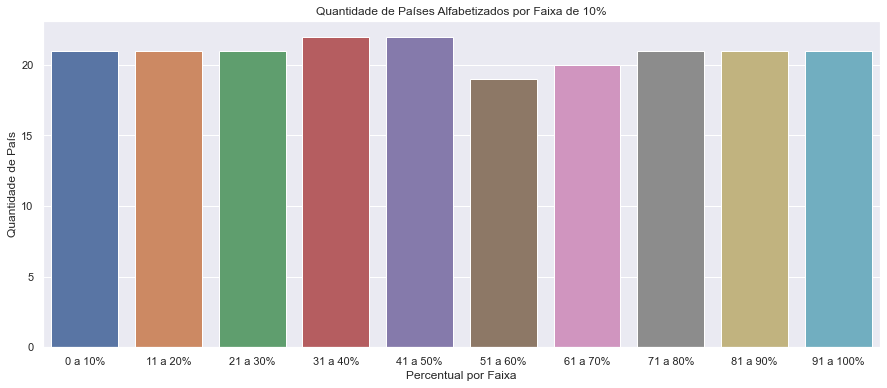

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = df['faixa_alfabetiza'], data=df['faixa_alfabetiza'].value_counts())
ax.set_title('Quantidade de Países Alfabetizados por Faixa de 10%')
ax.set_ylabel('Quantidade de País')
ax.set_xlabel('Percentual por Faixa')
plt.show()